# Nye modeller med hold out valideringssæt af 5 subjects

In [1]:
import mne
import numpy as np
import pandas as pd
import sys
import re
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from scipy.io import *
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report, log_loss, roc_curve, auc
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from collections import Counter

In [2]:
eyes_open_files = [r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10002_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10135_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10136_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10138_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10139_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10140_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10142_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10148_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10155_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10158_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10160_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10161_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10165_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10166_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10169_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10171_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10174_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10175_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10188_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10189_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10190_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10192_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10193_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10194_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10195_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10203_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10204_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10207_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10209_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10213_p01_epoched_EyesOpen_marked.set']
eyes_closed_files = [r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10213_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10209_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10207_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10204_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10203_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10195_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10194_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10193_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10192_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10190_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10189_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10188_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10175_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10174_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10171_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10169_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10166_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10165_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10161_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10160_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10158_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10155_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10148_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10142_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10140_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10139_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10138_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10136_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10135_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10002_p01_epoched_60EpochsMarked.set']

set_files = eyes_open_files+eyes_closed_files

### Pre-processing 

In [3]:
# empty lists to hold the data and labels
X_list = []  # Features (PSD data)
y_list = []  # Labels (eyes-open/eyes-closed)    
subject_ids = []


# loop through each subject
for file in set_files:
    # Load the .set file for the subject
    epochs = mne.io.read_epochs_eeglab(file)
    
    # loading .set data as MATLAB to extract labels
    mat = loadmat(file, struct_as_record=False, squeeze_me=True)
    rejmanual = mat['reject'].rejmanual  # array of 0 and 1

    # getting labels from rejmanual 
    labels = np.array(rejmanual, dtype=int)

    # computing PSD for the current subject
    psd = epochs.compute_psd()

    # getting the PSD data and reshaping it (flattening the 3d array to 2d for logistic regression)
    psd_data = psd.get_data()  # Shape: (n_epochs, n_channels, n_freqs)

    # extracting marked epochs 
    eyes_marked = labels == 0
    psd_data_marked = psd_data[eyes_marked]

    # assigning labels based on file type
    if file in eyes_closed_files:
        final_labels = np.ones(psd_data_marked.shape[0], dtype=int)
    else:
        final_labels = np.zeros(psd_data_marked.shape[0], dtype=int)

    # flattening the data into a 2d matrix 
    psd_data_final = psd_data_marked.reshape(psd_data_marked.shape[0], -1)  # Shape: (n_epochs, n_channels * n_freqs)

    X_list.append(psd_data_final)
    y_list.append(final_labels)

    # Extracting the subject IDs from the file path
    match = re.search(r'\\(\d{5})_', file)
    if match:
        subject_id = int(match.group(1))
    else:
        raise ValueError(f"Could not extract subject ID from path: {file}")

    subject_ids.extend([subject_id] * psd_data_final.shape[0])


X_combined = np.vstack(X_list)  # Shape: (total_epochs, n_channels * n_freqs)
y_combined = np.hstack(y_list)  # Shape: (total_epochs,)
subject_ids = np.array(subject_ids)

print(subject_ids)

Extracting parameters from E:\ChristianMusaeus\Data\Eyes_closed_marked\10002_p01_epoched_EyesOpen_marked.set...
Not setting metadata
1807 matching events found
No baseline correction applied
0 projection items activated
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting parameters from E:\ChristianMusaeus\Data\Eyes_closed_marked\10135_p01_epoched_EyesOpen_marked.set...
Not setting metadata
1901 matching events found
No baseline correction applied
0 projection items activated
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting parameters from E:\ChristianMusaeus\Data\Eyes_closed_marked\10136_p01_epoched_EyesOpen_marked.set...
Not setting metadata
3123 matching events found
No baseline correction applied
0 projection items activated
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting parameters from E:\ChristianMusaeus\Data\Eyes_closed_marked\10138_p01_epoched_EyesOpen_marked.set...
Not setting metadata
185

## Logistic Regression

### The inner loop finds the optimal value for frequency bin number and regularization parameter C and trains the model on 25 of the 30 subjects, before testing the outer loop on the 5 subjects in the hold out test set. 

In [4]:
n_channels = 19
n_freqs = X_combined.shape[1] // n_channels

freq_bin_options = [5,10,15,20,25,30]
C_grid = [0.01, 0.1,0.2,0.5,1]

def reduce_freq_resolution(X, n_bins):
    bin_size = n_freqs // n_bins
    X_reshaped = X.reshape(-1, n_channels, n_freqs)
    reduced = np.stack([
        X_reshaped[:, :, i * bin_size:(i + 1) * bin_size].mean(axis=2)
        for i in range(n_bins)
    ], axis=2)
    return reduced.reshape(X.shape[0], -1)

# 1. Split test set (5 random subjects, fixed seed)
unique_subjects = np.unique(subject_ids)
np.random.seed(13)
test_subjects = np.random.choice(unique_subjects, size=5, replace=False)
np.save("test_subjects.npy", test_subjects)
train_subjects = np.setdiff1d(unique_subjects, test_subjects)

train_idx = np.where(np.isin(subject_ids, train_subjects))[0]
test_idx = np.where(np.isin(subject_ids, test_subjects))[0]

X_train = X_combined[train_idx]
y_train = y_combined[train_idx]
train_subj_ids = subject_ids[train_idx]

X_test = X_combined[test_idx]
y_test = y_combined[test_idx]

outer_loo = LeaveOneOut()
inner_subjects = np.unique(train_subj_ids)
best_n_bins_per_fold = []
best_C_per_fold = []
val_accuracies = []
val_subject_ids = []

for fold_num, (train_sub_idx, val_sub_idx) in enumerate(outer_loo.split(inner_subjects), start=1):
    print(f"Processing fold {fold_num}/{len(inner_subjects)}...")

    inner_train_subj = inner_subjects[train_sub_idx]
    val_subj = inner_subjects[val_sub_idx[0]]

    inner_train_idx = np.where(np.isin(train_subj_ids, inner_train_subj))[0]
    val_idx = np.where(train_subj_ids == val_subj)[0]

    X_inner = X_train[inner_train_idx]
    y_inner = y_train[inner_train_idx]
    X_val = X_train[val_idx]
    y_val = y_train[val_idx]

    best_score = -np.inf
    best_n_bins = None
    best_C = None
    best_model = None
    best_scaler = None

    for n_bins in freq_bin_options:
        for C in C_grid:
            X_inner_binned = reduce_freq_resolution(X_inner, n_bins)
            X_val_binned = reduce_freq_resolution(X_val, n_bins)

            scaler = StandardScaler()
            X_inner_scaled = scaler.fit_transform(X_inner_binned)
            X_val_scaled = scaler.transform(X_val_binned)

            clf = LogisticRegression(C=C, max_iter=1000)
            clf.fit(X_inner_scaled, y_inner)
            probs = clf.predict_proba(X_val_scaled)
            score = -log_loss( y_val,probs)
            acc = accuracy_score(y_val, clf.predict(X_val_scaled))

            if score > best_score:
                best_score = score
                best_n_bins = n_bins
                best_C = C
                best_model = clf
                best_scaler = scaler

    preds = best_model.predict(best_scaler.transform(reduce_freq_resolution(X_val, best_n_bins)))
    best_n_bins_per_fold.append(best_n_bins)
    best_C_per_fold.append(best_C)
    val_accuracies.append(acc)
    val_subject_ids.append(val_subj)

np.save("val_accuracies.npy", np.array(val_accuracies))
np.save("val_subject_ids.npy", np.array(val_subject_ids))

# Retrain model with best hyperparameters
final_n_bins = Counter(best_n_bins_per_fold).most_common(1)[0][0]
final_C = Counter(best_C_per_fold).most_common(1)[0][0]

X_train_binned = reduce_freq_resolution(X_train, final_n_bins)
X_test_binned = reduce_freq_resolution(X_test, final_n_bins)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_binned)
X_test_scaled = scaler.transform(X_test_binned)

final_model = LogisticRegression(C=final_C, max_iter=1000)
final_model.fit(X_train_scaled, y_train)

# Save model, scaler and bins
joblib.dump(final_model, "final_model_lr.pkl")
joblib.dump(scaler, "final_scaler_lr.pkl")
np.save("final_n_bins_lr.npy", final_n_bins)

# 4. Evaluate on test set
y_pred = final_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Processing fold 1/25...
Processing fold 2/25...
Processing fold 3/25...
Processing fold 4/25...
Processing fold 5/25...
Processing fold 6/25...
Processing fold 7/25...
Processing fold 8/25...
Processing fold 9/25...
Processing fold 10/25...
Processing fold 11/25...
Processing fold 12/25...
Processing fold 13/25...
Processing fold 14/25...
Processing fold 15/25...
Processing fold 16/25...
Processing fold 17/25...
Processing fold 18/25...
Processing fold 19/25...
Processing fold 20/25...
Processing fold 21/25...
Processing fold 22/25...
Processing fold 23/25...
Processing fold 24/25...
Processing fold 25/25...
Accuracy: 0.8227848101265823
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.98      0.83       253
           1       0.97      0.69      0.81       300

    accuracy                           0.82       553
   macro avg       0.85      0.83      0.82       553
weighted avg       0.86      0.82      0.82       553

Conf

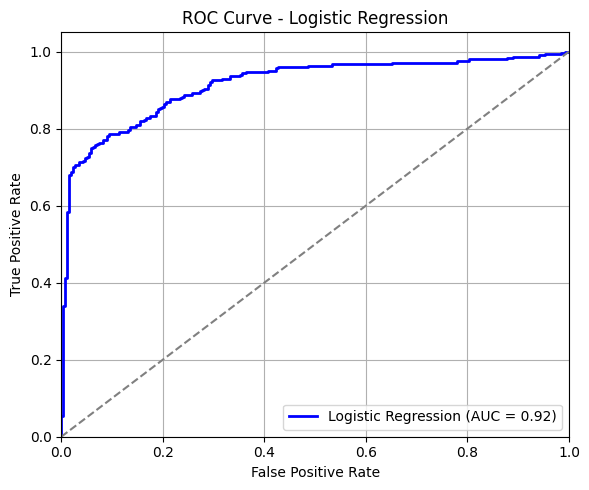

In [29]:
# Get predicted probabilities for class 1 (Eyes Closed)
y_proba = final_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"Logistic Regression (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
print("Accuracy:", acc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8227848101265823
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.98      0.83       253
           1       0.97      0.69      0.81       300

    accuracy                           0.82       553
   macro avg       0.85      0.83      0.82       553
weighted avg       0.86      0.82      0.82       553

Confusion Matrix:
 [[247   6]
 [ 92 208]]


### Plotting the test accuracy for each of the 25 subjcts in the training set during LOSO

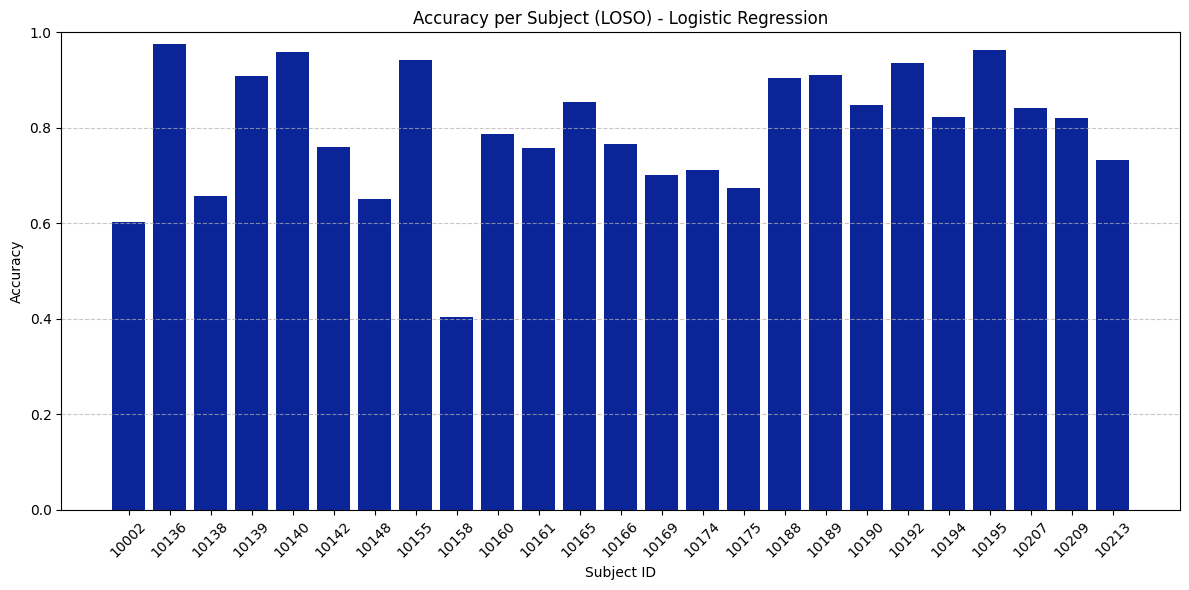

In [32]:
# Load saved data
val_accuracies = np.load("val_accuracies.npy")
val_subject_ids = np.load("val_subject_ids.npy")

# Sort by subject ID for better visualization
sorted_indices = np.argsort(val_subject_ids)
sorted_subjects = val_subject_ids[sorted_indices]
sorted_accuracies = val_accuracies[sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(sorted_subjects.astype(str), sorted_accuracies, color="#0B2599")
plt.title("Accuracy per Subject (LOSO) - Logistic Regression")
plt.xlabel("Subject ID")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Printing the chosen hyperparameters 

In [8]:
# Find de mest brugte værdier for n_bins og C
final_n_bins = Counter(best_n_bins_per_fold).most_common(1)[0][0]
final_C = Counter(best_C_per_fold).most_common(1)[0][0]

print("\n🎯 Bedste hyperparametre fundet i inner loop:")
print(f"   - Antal frekvens-bins (n_bins): {final_n_bins}")
print(f"   - Regulariseringsparameter (C): {final_C}")


🎯 Bedste hyperparametre fundet i inner loop:
   - Antal frekvens-bins (n_bins): 5
   - Regulariseringsparameter (C): 1


## Plotting accuracy per subject in the hold out set 

Per-subject performance:
Subject 10135: Accuracy = 0.68, Precision = 1.00, Recall = 0.05
Subject 10171: Accuracy = 0.97, Precision = 0.97, Recall = 1.00
Subject 10193: Accuracy = 0.67, Precision = 0.96, Recall = 0.42
Subject 10203: Accuracy = 1.00, Precision = 1.00, Recall = 1.00
Subject 10204: Accuracy = 0.96, Precision = 0.95, Recall = 1.00


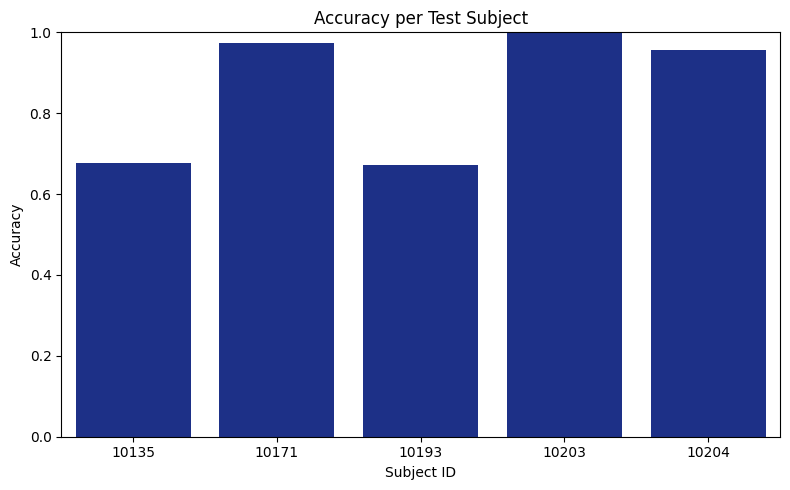

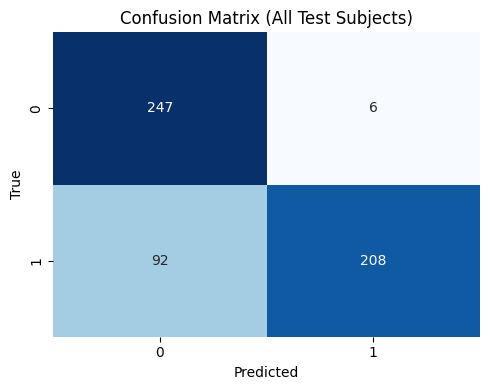

In [33]:
# 1. Group predictions by test subject
test_subjects_unique = np.unique(subject_ids[test_idx])
subject_metrics = []

for subj in test_subjects_unique:
    subj_mask = subject_ids[test_idx] == subj
    y_true_subj = y_test[subj_mask]
    y_pred_subj = y_pred[subj_mask]

    acc_subj = accuracy_score(y_true_subj, y_pred_subj)
    prec_subj = precision_score(y_true_subj, y_pred_subj)
    rec_subj = recall_score(y_true_subj, y_pred_subj)

    subject_metrics.append({
        'subject': subj,
        'accuracy': acc_subj,
        'precision': prec_subj,
        'recall': rec_subj
    })

# 2. Print metrics per subject
print("Per-subject performance:")
for metrics in subject_metrics:
    print(f"Subject {metrics['subject']}: "
          f"Accuracy = {metrics['accuracy']:.2f}, "
          f"Precision = {metrics['precision']:.2f}, "
          f"Recall = {metrics['recall']:.2f}")

# 3. Plot accuracy per subject
plt.figure(figsize=(8, 5))
subject_ids_sorted = [m['subject'] for m in subject_metrics]
accuracies = [m['accuracy'] for m in subject_metrics]
sns.barplot(x=subject_ids_sorted, y=accuracies, color="#0B2599")
plt.ylim(0, 1)
plt.title("Accuracy per Test Subject")
plt.xlabel("Subject ID")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# 4. Combined confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (All Test Subjects)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

### Saving predictions and stuff for statistical tests

In [10]:
np.save('y_test.npy', y_test)
np.save('y_pred_lr.npy', y_pred)
np.save('probs_lr.npy', final_model.predict_proba(X_test_scaled))
np.save('subject_ids_test.npy', subject_ids[test_idx])

# SVM 

In [11]:
n_channels = 19
n_freqs = X_combined.shape[1] // n_channels

# Load test subjects used in logistic regression
test_subjects_svm = np.load("test_subjects.npy")
train_subjects_svm = np.setdiff1d(np.unique(subject_ids), test_subjects_svm)

train_idx_svm = np.where(np.isin(subject_ids, train_subjects_svm))[0]
test_idx_svm = np.where(np.isin(subject_ids, test_subjects_svm))[0]

X_train_svm = X_combined[train_idx_svm]
y_train_svm = y_combined[train_idx_svm]
train_subj_ids_svm = subject_ids[train_idx_svm]

X_test_svm = X_combined[test_idx_svm]
y_test_svm = y_combined[test_idx_svm]

# Define parameter grids
freq_bin_options_svm = [5]
C_grid_svm = [0.01, 0.1, 0.5]

def reduce_freq_resolution_svm(X, n_bins):
    bin_size = n_freqs // n_bins
    X_reshaped = X.reshape(-1, n_channels, n_freqs)
    reduced = np.stack([
        X_reshaped[:, :, i * bin_size:(i + 1) * bin_size].mean(axis=2)
        for i in range(n_bins)
    ], axis=2)
    return reduced.reshape(X.shape[0], -1)

# Nested LOSO CV on training set
outer_loo_svm = LeaveOneOut()
inner_subjects_svm = np.unique(train_subj_ids_svm)
best_n_bins_per_fold_svm = []
best_C_per_fold_svm = []
val_accuracies_svm = []
val_subject_ids_svm = []

for i, (train_sub_idx, val_sub_idx) in enumerate(outer_loo_svm.split(inner_subjects_svm), 1):
    print(f"SVM Fold {i}/{len(inner_subjects_svm)}")

    inner_train_subj_svm = inner_subjects_svm[train_sub_idx]
    val_subj_svm = inner_subjects_svm[val_sub_idx[0]]

    inner_train_idx_svm = np.where(np.isin(train_subj_ids_svm, inner_train_subj_svm))[0]
    val_idx_svm = np.where(train_subj_ids_svm == val_subj_svm)[0]

    X_inner_svm = X_train_svm[inner_train_idx_svm]
    y_inner_svm = y_train_svm[inner_train_idx_svm]
    X_val_svm = X_train_svm[val_idx_svm]
    y_val_svm = y_train_svm[val_idx_svm]

    best_score_svm = -np.inf
    best_n_bins_svm = None
    best_C_svm = None

    for n_bins in freq_bin_options_svm:
        for C in C_grid_svm:
            X_inner_binned_svm = reduce_freq_resolution_svm(X_inner_svm, n_bins)
            X_val_binned_svm = reduce_freq_resolution_svm(X_val_svm, n_bins)

            scaler_svm = StandardScaler()
            X_inner_scaled_svm = scaler_svm.fit_transform(X_inner_binned_svm)
            X_val_scaled_svm = scaler_svm.transform(X_val_binned_svm)

            clf_svm = SVC(C=C, kernel='linear', probability=True)
            clf_svm.fit(X_inner_scaled_svm, y_inner_svm)
            probs = clf_svm.predict_proba(X_val_scaled_svm)
            score = -log_loss(y_val_svm, probs)
            acc = accuracy_score(y_val_svm, clf_svm.predict(X_val_scaled_svm))

            if score > best_score_svm:
                best_score_svm = score
                best_n_bins_svm = n_bins
                best_C_svm = C
    
    best_n_bins_per_fold_svm.append(best_n_bins_svm)
    best_C_per_fold_svm.append(best_C_svm)
    val_accuracies_svm.append(acc)
    val_subject_ids_svm.append(val_subj_svm)

# Save per-subject validation accuracy
np.save("val_svm_accuracies.npy", np.array(val_accuracies_svm))
np.save("val_svm_subject_ids.npy", np.array(val_subject_ids_svm))

# Train final model
final_n_bins_svm = Counter(best_n_bins_per_fold_svm).most_common(1)[0][0]
final_C_svm = Counter(best_C_per_fold_svm).most_common(1)[0][0]

X_train_binned_svm = reduce_freq_resolution_svm(X_train_svm, final_n_bins_svm)
X_test_binned_svm = reduce_freq_resolution_svm(X_test_svm, final_n_bins_svm)

scaler_final_svm = StandardScaler()
X_train_scaled_svm = scaler_final_svm.fit_transform(X_train_binned_svm)
X_test_scaled_svm = scaler_final_svm.transform(X_test_binned_svm)

final_model_svm = SVC(C=final_C_svm, kernel='linear', probability=True)
final_model_svm.fit(X_train_scaled_svm, y_train_svm)

# Save model and scaler
joblib.dump(final_model_svm, "final_model_svm.pkl")
joblib.dump(scaler_final_svm, "final_scaler_svm.pkl")
np.save("final_n_bins_svm.npy", final_n_bins_svm)

# Evaluate on test set
y_pred_svm = final_model_svm.predict(X_test_scaled_svm)
acc_svm = accuracy_score(y_test_svm, y_pred_svm)
report_svm = classification_report(y_test_svm, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test_svm, y_pred_svm)
y_proba_svm = final_model_svm.predict_proba(X_test_scaled_svm)
loss_svm = log_loss(y_test_svm, y_proba_svm)

print("SVM Accuracy:", acc_svm)
print("SVM Log Loss:", loss_svm)
print("SVM Classification Report:\n", report_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)


SVM Fold 1/25
SVM Fold 2/25
SVM Fold 3/25
SVM Fold 4/25
SVM Fold 5/25
SVM Fold 6/25
SVM Fold 7/25
SVM Fold 8/25
SVM Fold 9/25
SVM Fold 10/25
SVM Fold 11/25
SVM Fold 12/25
SVM Fold 13/25
SVM Fold 14/25
SVM Fold 15/25
SVM Fold 16/25
SVM Fold 17/25
SVM Fold 18/25
SVM Fold 19/25
SVM Fold 20/25
SVM Fold 21/25
SVM Fold 22/25
SVM Fold 23/25
SVM Fold 24/25
SVM Fold 25/25
SVM Accuracy: 0.7251356238698011
SVM Log Loss: 1.6125639675777543
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.85      0.74       253
           1       0.83      0.62      0.71       300

    accuracy                           0.73       553
   macro avg       0.74      0.73      0.72       553
weighted avg       0.75      0.73      0.72       553

SVM Confusion Matrix:
 [[215  38]
 [114 186]]


In [12]:
print("Accuracy:", acc_svm)
print("Classification Report:\n", report_svm)
print("Confusion Matrix:\n", conf_matrix_svm)

Accuracy: 0.7251356238698011
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.85      0.74       253
           1       0.83      0.62      0.71       300

    accuracy                           0.73       553
   macro avg       0.74      0.73      0.72       553
weighted avg       0.75      0.73      0.72       553

Confusion Matrix:
 [[215  38]
 [114 186]]


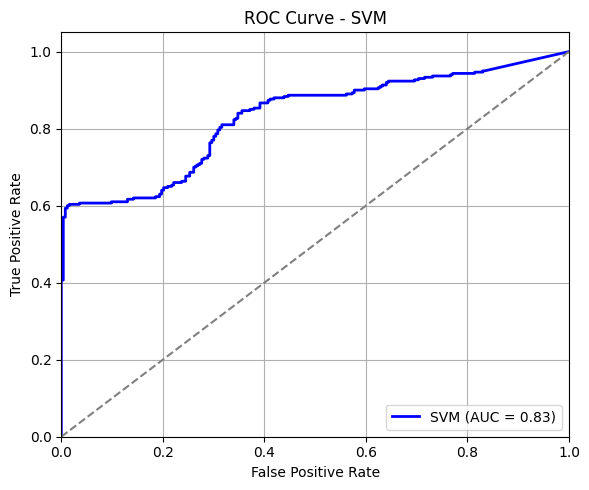

In [34]:
# Get predicted probabilities for class 1 (Eyes Closed)
y_proba_svm_class1 = y_proba_svm[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_svm, y_proba_svm_class1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"SVM (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# Accuracies of the 25 test subjects

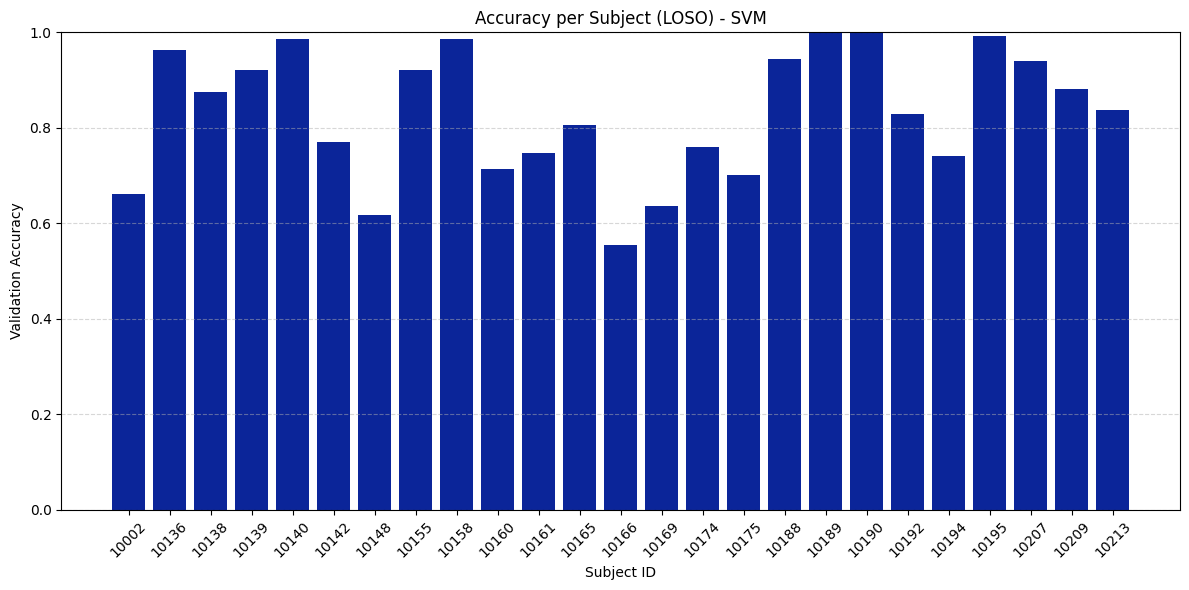

In [35]:
# Load saved accuracies and subject IDs
val_accuracies = np.load("val_svm_accuracies.npy")
val_subject_ids = np.load("val_svm_subject_ids.npy")

# Sort by subject ID for a cleaner plot
sorted_indices = np.argsort(val_subject_ids)
val_subject_ids = val_subject_ids[sorted_indices]
val_accuracies = val_accuracies[sorted_indices]

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar([str(sid) for sid in val_subject_ids], val_accuracies, color="#0B2599")
plt.xlabel("Subject ID")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy per Subject (LOSO) - SVM")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## Print hyperparams

In [15]:
final_n_bins_svm = Counter(best_n_bins_per_fold_svm).most_common(1)[0][0]
final_C_svm = Counter(best_C_per_fold_svm).most_common(1)[0][0]

print("\n Bedste hyperparametre fundet i SVM (inner loop):")
print(f"   - Antal frekvens-bins (n_bins): {final_n_bins_svm}")
print(f"   - Regulariseringsparameter (C): {final_C_svm}")



 Bedste hyperparametre fundet i SVM (inner loop):
   - Antal frekvens-bins (n_bins): 5
   - Regulariseringsparameter (C): 0.01


## Subject wise analysis

📊 Per-subject performance (SVM):
Subject 10135: Accuracy = 0.69, Precision = 1.00, Recall = 0.08
Subject 10171: Accuracy = 0.87, Precision = 0.86, Recall = 1.00
Subject 10193: Accuracy = 0.46, Precision = 1.00, Recall = 0.02
Subject 10203: Accuracy = 0.80, Precision = 0.71, Recall = 1.00
Subject 10204: Accuracy = 0.94, Precision = 0.94, Recall = 1.00


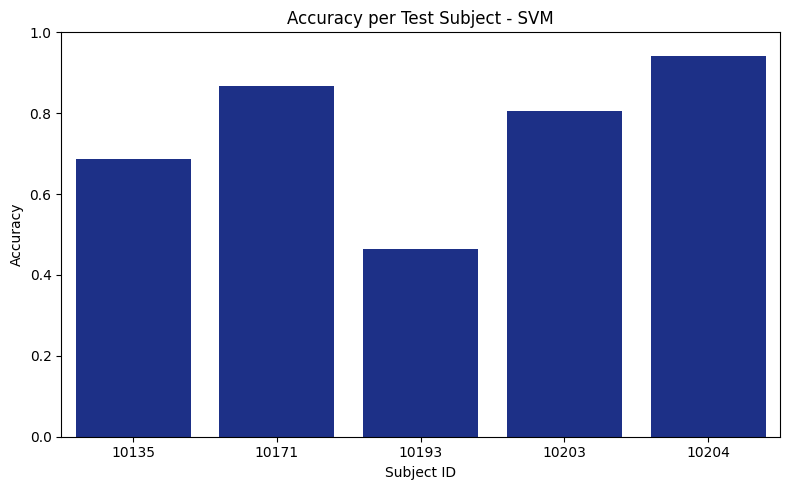

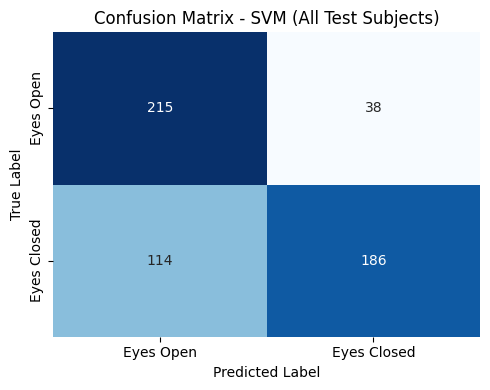

In [36]:
# 1. Group predictions by SVM test subject
test_subjects_unique_svm = np.unique(subject_ids[test_idx_svm])
subject_metrics_svm = []

for subj in test_subjects_unique_svm:
    subj_mask = subject_ids[test_idx_svm] == subj
    y_true_subj = y_test_svm[subj_mask]
    y_pred_subj = y_pred_svm[subj_mask]

    acc_subj = accuracy_score(y_true_subj, y_pred_subj)
    prec_subj = precision_score(y_true_subj, y_pred_subj, zero_division=0)
    rec_subj = recall_score(y_true_subj, y_pred_subj, zero_division=0)

    subject_metrics_svm.append({
        'subject': subj,
        'accuracy': acc_subj,
        'precision': prec_subj,
        'recall': rec_subj
    })

# 2. Print SVM metrics per subject
print("📊 Per-subject performance (SVM):")
for metrics in subject_metrics_svm:
    print(f"Subject {metrics['subject']}: "
          f"Accuracy = {metrics['accuracy']:.2f}, "
          f"Precision = {metrics['precision']:.2f}, "
          f"Recall = {metrics['recall']:.2f}")

# 3. Plot accuracy per subject (SVM)
plt.figure(figsize=(8, 5))
subject_ids_sorted_svm = [m['subject'] for m in subject_metrics_svm]
accuracies_svm = [m['accuracy'] for m in subject_metrics_svm]
sns.barplot(x=subject_ids_sorted_svm, y=accuracies_svm, color="#0B2599")
plt.ylim(0, 1)
plt.title("Accuracy per Test Subject - SVM")
plt.xlabel("Subject ID")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# 4. Combined confusion matrix (SVM)
conf_matrix_svm = confusion_matrix(y_test_svm, y_pred_svm)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Eyes Open", "Eyes Closed"],
            yticklabels=["Eyes Open", "Eyes Closed"])
plt.title("Confusion Matrix - SVM (All Test Subjects)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


### Saving files for statistical tests

In [17]:
np.save('y_pred_svm.npy', y_pred_svm)
np.save('probs_svm.npy', y_proba_svm)

# Random Forest

In [18]:
# Assume X_combined, y_combined, subject_ids are already defined
n_channels = 19
n_freqs = X_combined.shape[1] // n_channels

# Load fixed test subjects
test_subjects_rf = np.load("test_subjects.npy")
train_subjects_rf = np.setdiff1d(np.unique(subject_ids), test_subjects_rf)

train_idx_rf = np.where(np.isin(subject_ids, train_subjects_rf))[0]
test_idx_rf = np.where(np.isin(subject_ids, test_subjects_rf))[0]

X_train_rf = X_combined[train_idx_rf]
y_train_rf = y_combined[train_idx_rf]
train_subj_ids_rf = subject_ids[train_idx_rf]

X_test_rf = X_combined[test_idx_rf]
y_test_rf = y_combined[test_idx_rf]

# Hyperparameter grids
freq_bin_options_rf = [5]
n_estimators_grid_rf = [100, 150]
max_depth_grid_rf = [None, 10, 20]

def reduce_freq_resolution_rf(X, n_bins):
    bin_size = n_freqs // n_bins
    X_reshaped = X.reshape(-1, n_channels, n_freqs)
    reduced = np.stack([
        X_reshaped[:, :, i * bin_size:(i + 1) * bin_size].mean(axis=2)
        for i in range(n_bins)
    ], axis=2)
    return reduced.reshape(X.shape[0], -1)

# Nested LOSO
outer_loo_rf = LeaveOneOut()
inner_subjects_rf = np.unique(train_subj_ids_rf)
best_n_bins_per_fold_rf = []
best_n_estimators_per_fold_rf = []
best_max_depth_per_fold_rf = []
val_accuracies_rf = []
val_log_losses_rf = []
val_subject_ids_rf = []

for i, (train_sub_idx, val_sub_idx) in enumerate(outer_loo_rf.split(inner_subjects_rf), 1):
    print(f"RF Fold {i}/{len(inner_subjects_rf)}")

    inner_train_subj = inner_subjects_rf[train_sub_idx]
    val_subj = inner_subjects_rf[val_sub_idx[0]]

    inner_train_idx = np.where(np.isin(train_subj_ids_rf, inner_train_subj))[0]
    val_idx = np.where(train_subj_ids_rf == val_subj)[0]

    X_inner = X_train_rf[inner_train_idx]
    y_inner = y_train_rf[inner_train_idx]
    X_val = X_train_rf[val_idx]
    y_val = y_train_rf[val_idx]

    best_score = -np.inf
    best_n_bins = None
    best_n_estimators = None
    best_max_depth = None
    best_acc = None
    best_loss = None

    for n_bins in freq_bin_options_rf:
        for n_estimators in n_estimators_grid_rf:
            for max_depth in max_depth_grid_rf:
                X_inner_binned = reduce_freq_resolution_rf(X_inner, n_bins)
                X_val_binned = reduce_freq_resolution_rf(X_val, n_bins)

                scaler = StandardScaler()
                X_inner_scaled = scaler.fit_transform(X_inner_binned)
                X_val_scaled = scaler.transform(X_val_binned)

                clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=13)
                clf.fit(X_inner_scaled, y_inner)
                proba = clf.predict_proba(X_val_scaled)
                score = -log_loss(y_val, proba)
                acc = accuracy_score(y_val, clf.predict(X_val_scaled))

                if score > best_score:
                    best_score = score
                    best_n_bins = n_bins
                    best_n_estimators = n_estimators
                    best_max_depth = max_depth
                    best_acc = acc
                    best_loss = score

    best_n_bins_per_fold_rf.append(best_n_bins)
    best_n_estimators_per_fold_rf.append(best_n_estimators)
    best_max_depth_per_fold_rf.append(best_max_depth)
    val_accuracies_rf.append(best_acc)
    val_log_losses_rf.append(best_loss)
    val_subject_ids_rf.append(val_subj)

# Save validation results
np.save("rf_val_accuracies.npy", np.array(val_accuracies_rf))
np.save("rf_val_log_losses.npy", np.array(val_log_losses_rf))
np.save("rf_val_subject_ids.npy", np.array(val_subject_ids_rf))

# Train final model
final_n_bins_rf = Counter(best_n_bins_per_fold_rf).most_common(1)[0][0]
final_n_estimators_rf = Counter(best_n_estimators_per_fold_rf).most_common(1)[0][0]
final_max_depth_rf = Counter(best_max_depth_per_fold_rf).most_common(1)[0][0]

X_train_binned_rf = reduce_freq_resolution_rf(X_train_rf, final_n_bins_rf)
X_test_binned_rf = reduce_freq_resolution_rf(X_test_rf, final_n_bins_rf)

scaler_rf = StandardScaler()
X_train_scaled_rf = scaler_rf.fit_transform(X_train_binned_rf)
X_test_scaled_rf = scaler_rf.transform(X_test_binned_rf)

final_model_rf = RandomForestClassifier(
    n_estimators=final_n_estimators_rf,
    max_depth=final_max_depth_rf,
    random_state=42
)
final_model_rf.fit(X_train_scaled_rf, y_train_rf)

# Save final model
joblib.dump(final_model_rf, "final_model_rf.pkl")
joblib.dump(scaler_rf, "final_scaler_rf.pkl")
np.save("final_n_bins_rf.npy", final_n_bins_rf)

# Evaluate on test set
y_pred_rf = final_model_rf.predict(X_test_scaled_rf)
acc_rf = accuracy_score(y_test_rf, y_pred_rf)
y_proba_rf = final_model_rf.predict_proba(X_test_scaled_rf)
loss_rf = log_loss(y_test_rf, y_proba_rf)
report_rf = classification_report(y_test_rf, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

print("RF Accuracy:", acc_rf)
print("RF Log Loss:", loss_rf)
print("RF Classification Report:\n", report_rf)
print("RF Confusion Matrix:\n", conf_matrix_rf)


RF Fold 1/25
RF Fold 2/25
RF Fold 3/25
RF Fold 4/25
RF Fold 5/25
RF Fold 6/25
RF Fold 7/25
RF Fold 8/25
RF Fold 9/25
RF Fold 10/25
RF Fold 11/25
RF Fold 12/25
RF Fold 13/25
RF Fold 14/25
RF Fold 15/25
RF Fold 16/25
RF Fold 17/25
RF Fold 18/25
RF Fold 19/25
RF Fold 20/25
RF Fold 21/25
RF Fold 22/25
RF Fold 23/25
RF Fold 24/25
RF Fold 25/25
RF Accuracy: 0.7739602169981917
RF Log Loss: 0.5151202407875507
RF Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.99      0.80       253
           1       0.99      0.59      0.74       300

    accuracy                           0.77       553
   macro avg       0.83      0.79      0.77       553
weighted avg       0.84      0.77      0.77       553

RF Confusion Matrix:
 [[251   2]
 [123 177]]


In [19]:
print("Accuracy:", acc_rf)
print("Log loss:", loss_rf)
print("Classification Report:\n", report_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

Accuracy: 0.7739602169981917
Log loss: 0.5151202407875507
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.99      0.80       253
           1       0.99      0.59      0.74       300

    accuracy                           0.77       553
   macro avg       0.83      0.79      0.77       553
weighted avg       0.84      0.77      0.77       553

Confusion Matrix:
 [[251   2]
 [123 177]]


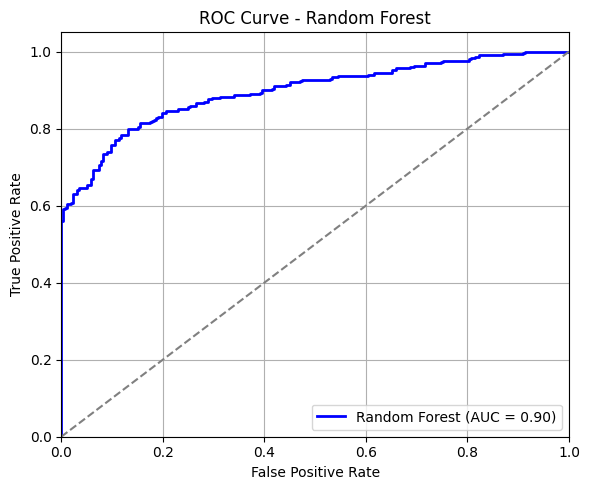

In [37]:
# Get probabilities for class 1 (Eyes Closed)
y_proba_rf_class1 = y_proba_rf[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_proba_rf_class1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color="blue", label=f"Random Forest (AUC = {roc_auc_rf:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# Accuracies of the 25 subjects in LOSO

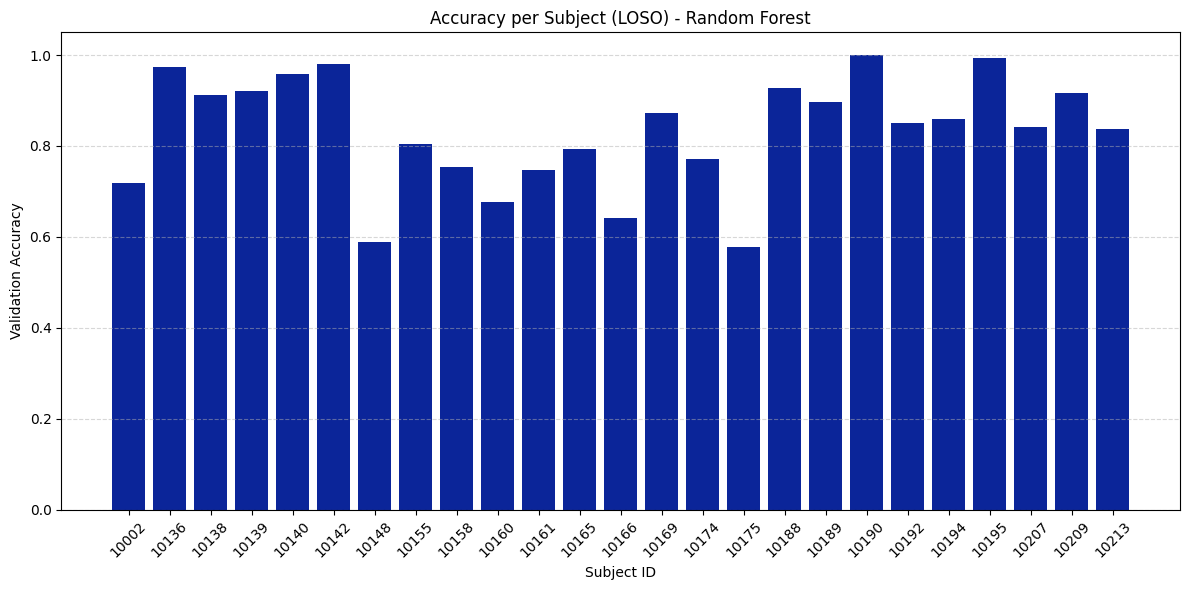

In [38]:
# Load the saved per-subject accuracies and IDs
val_accuracies = np.load("rf_val_accuracies.npy")
val_subject_ids = np.load("rf_val_subject_ids.npy")

# Sort by subject ID for better readability
sorted_indices = np.argsort(val_subject_ids)
sorted_subjects = val_subject_ids[sorted_indices]
sorted_accuracies = val_accuracies[sorted_indices]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar([str(subj) for subj in sorted_subjects], sorted_accuracies, color="#0B2599")
plt.xticks(rotation=45)
plt.xlabel("Subject ID")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy per Subject (LOSO) - Random Forest")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


## Print hyperparams

In [22]:
# Find de mest brugte værdier for n_bins, n_estimators og max_depth i RF
final_n_bins_rf = Counter(best_n_bins_per_fold_rf).most_common(1)[0][0]
final_n_estimators_rf = Counter(best_n_estimators_per_fold_rf).most_common(1)[0][0]
final_max_depth_rf = Counter(best_max_depth_per_fold_rf).most_common(1)[0][0]

print("\n Bedste hyperparametre fundet i Random Forest (inner loop):")
print(f"   - Antal frekvens-bins (n_bins): {final_n_bins_rf}")
print(f"   - Antal træer (n_estimators): {final_n_estimators_rf}")
print(f"   - Maks dybde på træer (max_depth): {final_max_depth_rf}")



 Bedste hyperparametre fundet i Random Forest (inner loop):
   - Antal frekvens-bins (n_bins): 5
   - Antal træer (n_estimators): 150
   - Maks dybde på træer (max_depth): 10


## Analysis of subjects in hold out set 

📊 Per-subject performance (Random Forest):
Subject 10135: Accuracy = 0.66, Precision = 0.00, Recall = 0.00
Subject 10171: Accuracy = 0.99, Precision = 0.98, Recall = 1.00
Subject 10193: Accuracy = 0.45, Precision = 0.00, Recall = 0.00
Subject 10203: Accuracy = 0.99, Precision = 1.00, Recall = 0.98
Subject 10204: Accuracy = 0.96, Precision = 0.98, Recall = 0.97


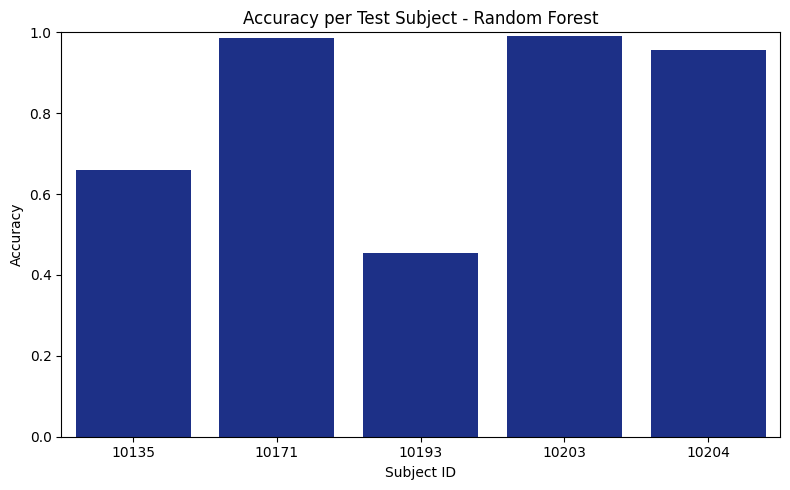

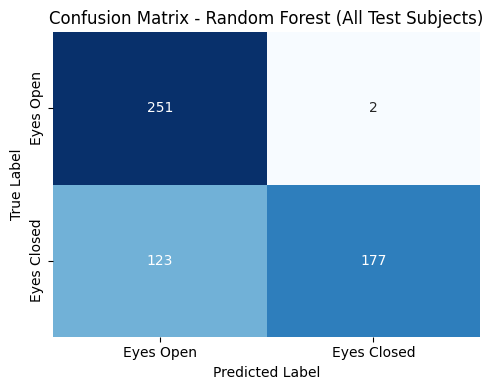

In [40]:
# 1. Group predictions by RF test subject
test_subjects_unique_rf = np.unique(subject_ids[test_idx_rf])
subject_metrics_rf = []

for subj in test_subjects_unique_rf:
    subj_mask = subject_ids[test_idx_rf] == subj
    y_true_subj = y_test_rf[subj_mask]
    y_pred_subj = y_pred_rf[subj_mask]

    acc_subj = accuracy_score(y_true_subj, y_pred_subj)
    prec_subj = precision_score(y_true_subj, y_pred_subj, zero_division=0)
    rec_subj = recall_score(y_true_subj, y_pred_subj, zero_division=0)

    subject_metrics_rf.append({
        'subject': subj,
        'accuracy': acc_subj,
        'precision': prec_subj,
        'recall': rec_subj
    })

# 2. Print RF metrics per subject
print("📊 Per-subject performance (Random Forest):")
for metrics in subject_metrics_rf:
    print(f"Subject {metrics['subject']}: "
          f"Accuracy = {metrics['accuracy']:.2f}, "
          f"Precision = {metrics['precision']:.2f}, "
          f"Recall = {metrics['recall']:.2f}")

# 3. Plot accuracy per subject (RF)
plt.figure(figsize=(8, 5))
subject_ids_sorted_rf = [m['subject'] for m in subject_metrics_rf]
accuracies_rf = [m['accuracy'] for m in subject_metrics_rf]
sns.barplot(x=subject_ids_sorted_rf, y=accuracies_rf, color="#0B2599")
plt.ylim(0, 1)
plt.title("Accuracy per Test Subject - Random Forest")
plt.xlabel("Subject ID")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# 4. Combined confusion matrix (RF)
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Eyes Open", "Eyes Closed"],
            yticklabels=["Eyes Open", "Eyes Closed"])
plt.title("Confusion Matrix - Random Forest (All Test Subjects)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


### Saving files for statistical tests

In [24]:
np.save('y_pred_rf.npy', y_pred_rf)
np.save('probs_rf.npy', y_proba_rf)

# Ensembling

In [25]:
# --- Feature reduction functions ---
def reduce_freq_resolution(X, n_channels, n_freqs, n_bins):
    bin_size = n_freqs // n_bins
    X_reshaped = X.reshape(-1, n_channels, n_freqs)
    reduced = np.stack([
        X_reshaped[:, :, i * bin_size:(i + 1) * bin_size].mean(axis=2)
        for i in range(n_bins)
    ], axis=2)
    return reduced.reshape(X.shape[0], -1)

# --- Load models and preprocessing ---
# Logistic Regression
lr_model = joblib.load("final_model_lr.pkl")
lr_scaler = joblib.load("final_scaler_lr.pkl")
lr_n_bins = int(np.load("final_n_bins_lr.npy"))

# SVM
svm_model = joblib.load("final_model_svm.pkl")
svm_scaler = joblib.load("final_scaler_svm.pkl")
svm_n_bins = int(np.load("final_n_bins_svm.npy"))

# Random Forest
rf_model = joblib.load("final_model_rf.pkl")
rf_scaler = joblib.load("final_scaler_rf.pkl")
rf_n_bins = int(np.load("final_n_bins_rf.npy"))

# --- Settings (update these for your data!) ---
n_channels = 19
n_freqs = X_combined.shape[1] // n_channels  # Or set to whatever matches your features

# --- Predict on new data (X_new) ---
def get_model_proba(model, scaler, n_bins, X, n_channels, n_freqs):
    X_binned = reduce_freq_resolution(X, n_channels, n_freqs, n_bins)
    X_scaled = scaler.transform(X_binned)
    probs = model.predict_proba(X_scaled)
    return probs

# Example: Predict on test set
X_ensemble = X_test_rf  # Or any data of shape (samples, features)

probs_lr = get_model_proba(lr_model, lr_scaler, lr_n_bins, X_ensemble, n_channels, n_freqs)
probs_svm = get_model_proba(svm_model, svm_scaler, svm_n_bins, X_ensemble, n_channels, n_freqs)
probs_rf = get_model_proba(rf_model, rf_scaler, rf_n_bins, X_ensemble, n_channels, n_freqs)

# --- Soft Voting Ensemble (average probabilities) ---
ensemble_probs = (probs_lr + probs_svm + probs_rf) / 3
ensemble_pred = np.argmax(ensemble_probs, axis=1)  # Class labels

# --- Evaluate ---

print("Ensemble Accuracy:", accuracy_score(y_test_rf, ensemble_pred))
print("Classification Report:\n", classification_report(y_test_rf, ensemble_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, ensemble_pred))


Ensemble Accuracy: 0.7811934900542495
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.99      0.81       253
           1       0.98      0.61      0.75       300

    accuracy                           0.78       553
   macro avg       0.83      0.80      0.78       553
weighted avg       0.84      0.78      0.78       553

Confusion Matrix:
 [[250   3]
 [118 182]]


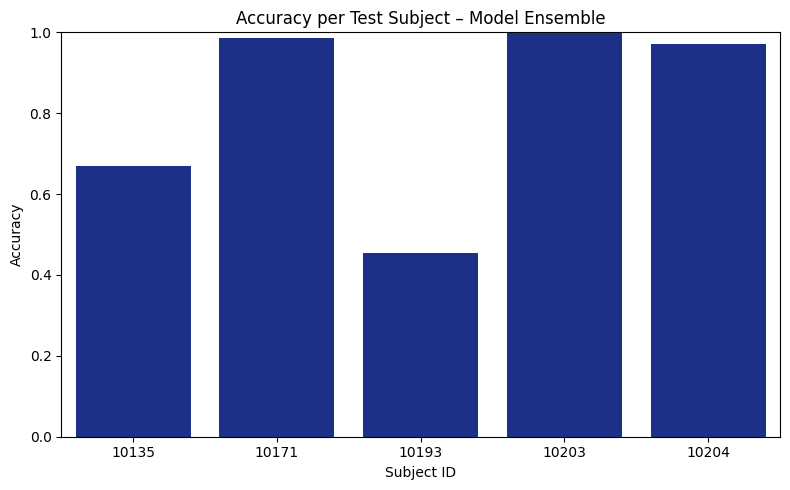

In [41]:
# --- Inputs (from your code context) ---
# y_test_rf: true labels for the RF test set
# ensemble_pred: predictions from the ensemble
# subject_ids_test: array of subject IDs matching y_test_rf

# --- Compute accuracy per subject ---
subject_ids_test = np.load("subject_ids_test.npy")
subject_accuracies = []
unique_subjects = np.unique(subject_ids_test)

for subj in unique_subjects:
    subj_mask = subject_ids_test == subj
    acc = accuracy_score(y_test_rf[subj_mask], ensemble_pred[subj_mask])
    subject_accuracies.append({'Subject': subj, 'Accuracy': acc})

# --- Convert to DataFrame ---
df_acc = pd.DataFrame(subject_accuracies)

# --- Plot ---
plt.figure(figsize=(8, 5))
sns.barplot(data=df_acc, x="Subject", y="Accuracy", color="#0B2599")
plt.ylim(0, 1)
plt.title("Accuracy per Test Subject – Model Ensemble")
plt.xlabel("Subject ID")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


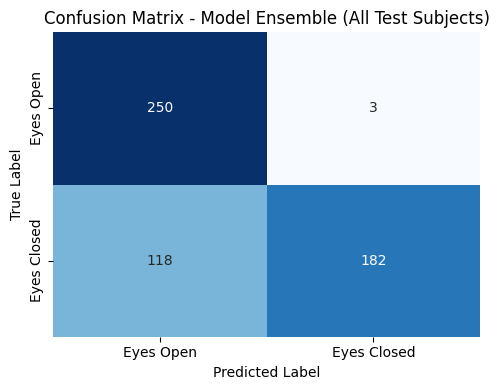

In [42]:
# --- Confusion Matrix for Ensemble Model ---
conf_matrix_ensemble = confusion_matrix(y_test_rf, ensemble_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Eyes Open", "Eyes Closed"],
            yticklabels=["Eyes Open", "Eyes Closed"])
plt.title("Confusion Matrix - Model Ensemble (All Test Subjects)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


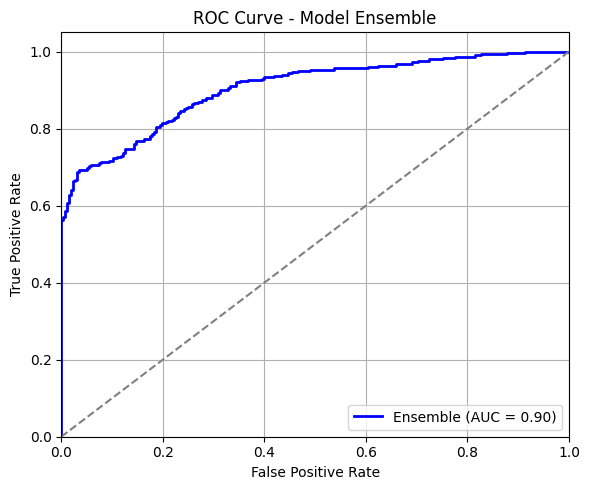

In [43]:
# Compute ROC curve and AUC for class 1 (Eyes Closed)
fpr, tpr, _ = roc_curve(y_test_rf, ensemble_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"Ensemble (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Model Ensemble")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
